# MovieBusters

## Introduction

The movie industry has been filled with intruiging what-ifs. It cn be Will Smith turning down the role of Neo in the Matrix. Nicholas Cage had been cast as Superman, but he only had time to try out the Superman costume before the movie got cancelled. The industry has been characterized by uncertainty which has left fans wondering what might have been. 

But, for peoplpe behind the camera, this uncertainity is not good enough. With MovieBusters, our goal is to reduce the erraticness and help movie houses with the decision making process which is backed with data and AI. We aim at using historical film data acquired from sources like IMDB and The Numbers to tesae out hidden patterns which can aid filmmakers like editors, writers, directors and actors in taking the right decision. 

The dataset scrapped from the above websites consist of film reated attributes like the year, the crew, boxoffice collection, audiience reviews and the movie summary. This data is cleaned to set the stage for further processing  which is then followed by analysis and predictions based on machine learning. 

We will answer the follwoing questions


#### 1. Which directors and actors are the production companies targeting? Are production companies choosing actors based on genres?
We will analyze the data to show which directors, production houses go to for a certain type of film/genre. We want to know directors who are more diverse with respect to the genres. 

#### 2. Which directors and actors are the production companies targeting? 
We want to see whether the actors targeted by the production companies match up with the actors who generate significantly high ratings. If there is a match, we can infer that the production companies are targeting these actors likely because they generate high profits. However, if the actors are not matched, we can infer that there might be some other reasons that the production companies are targeting these actors. 

#### 3. Do production companies target certain demographics? Does this vary by country?
We will analyze the country, language and year data to see if there is a trend that production houses follow to select the target country. Additionally, we want to identify the trend in the languages that the movies have been made in over the years.

#### 4. Do producers or production companies strategize release dates for certain kinds of films?
We want to identify the pattern int he movie release dates that the production houses follow. Additionally, we want to see if there is a correlation between the movie date and the boxoffice returns. 

#### 5. Are there specific keywords in the movie descriptions that tend to be more appealing to the audience?
We will split the description into several phrases and analyze the frequency of each phrase/ word to check if any of them are correlated to the popularity of the movie. 

## Data Processing

### 1. Data Acquisition

The following code will be working on the data provided in- **IMDb movies.csv** <br> 
We'll first import all required libraries :

In [22]:
# Importing libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We need to load the **IMDb movies.csv** file using `pd.read_csv`. File path needs to be changed accordingly based on your file location.

In [3]:
#Importing the IMDb Movies dataset
imdb = pd.read_csv('IMDb movies.csv',dtype={'year': str})
imdb.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


We will be using [The Numbers](https://www.the-numbers.com/) website to impute the missing values in the Worldwide_Gross_Income column

The following code will scrape data from the website and it takes very long to complete execution due to large amount of pages being examined, so we only execute it once and store the result in the `money.xlsx` file.<br> **Please avoid running the following cell!!**

In [ ]:
#Scraping data from The Numbers website
first_movie_index = 1
last_movie_index = 32901
movies_on_each_page = 100
for movie in range (first_movie_index,last_movie_index,movies_on_each_page):
    url = 'https://www.the-numbers.com/box-office-records/worldwide/all-movies/cumulative/all-time/' + str(movie)
    page = requests.get(url)
    page_soup = BeautifulSoup(page.text, 'html.parser')
    
    for n in range(81,281,2):
        df_name = df_name.append({'Year' : page_soup.find_all(name="a")[n].text, 'Movie' : page_soup.find_all(name="a")[n+1].text}, ignore_index = True)

    for x in range(0,300,3):
        df = df.append({'Worldwide Box Office' : page_soup.find_all(name = "td", align = 'right')[x].text, 'Domestic Box Office' : page_soup.find_all(name = "td", align = 'right')[x+1].text, 'International Box Office' : page_soup.find_all(name = "td", align = 'right')[x+2].text}, ignore_index = True)
    
money = pd.concat([df_name, df], axis=1)
money.to_excel("money.xlsx")

We need to load the **money.xlsx** file using `pd.read_excel`

In [4]:
#Importing the two dataset we are going to use
money = pd.read_excel('money.xlsx')

Then, We will use the movie name as the key to merge the 2 dataframes

In [5]:
# Converting the movie names to lower case and removing any spaces in the names for better match
imdb['Movietemp'] = imdb['original_title'].str.replace(' ','').str.lower()
money['Movietemp'] = money['Movie'].str.replace(' ','').str.lower()


We compare the box office data from both the dataset to check if they are valid

In [6]:
# merge money and imdb dataframe
df = pd.merge(money,imdb, on=['Movietemp'], how='inner')

We display the first 20 rows to validate the consistence

In [7]:
df[['Worldwide Box Office','worlwide_gross_income']].head(20)

,Worldwide Box Office,worlwide_gross_income
0,"$2,845,899,541",$ 2790439092
1,"$2,797,800,564",$ 2797800564
2,"$2,207,986,545",NaN
3,"$2,207,986,545",NaN
4,"$2,207,986,545",$ 2195169869
5,"$2,044,540,523",$ 2048359754
6,"$1,669,979,967",$ 1670401444
7,"$1,654,367,425",$ 968511805
8,"$1,654,367,425",$ 1656963790
9,"$986,214,868",$ 968511805


The worldwide Box Office column has been scrapred from the The Numbers website and the `worlwide_gross_income` column is from the IMDB dataset. We have merged the 2 dataframes to verify that the gross income data integrity is maintained. We can see that the numbers of the income data matches and hence, we can confirm that the IMDB data is accurate.

We will then try to impute missing values in  the worlwide_gross_income column with the corresponding values in Worldwide Box Office

In [8]:
# merge money and imdb dataframe
final = pd.merge(imdb,money, on=['Movietemp'], how='left')

Display the number of worlwide gross income before imputing any values

In [9]:
print(f"Before Imputing \n{final[['worlwide_gross_income','Worldwide Box Office']].count()}\n")

Before Imputing 
worlwide_gross_income    32428
Worldwide Box Office     23108
dtype: int64



Next, we impute missing values with the corresponding values in Worldwide Box Office

In [10]:
final.loc[final['worlwide_gross_income'].isnull(), 'worlwide_gross_income'] = final.loc[final['worlwide_gross_income'].isnull(), 'Worldwide Box Office']


Display the number of worlwide gross income after imputing any values

In [11]:
print(f"After Imputing \n{final[['worlwide_gross_income','Worldwide Box Office']].count()}")

After Imputing 
worlwide_gross_income    37380
Worldwide Box Office     23108
dtype: int64


We can finally see that there are approximately 5000 rows more missing value having been imputed

### 2. DATA CLEANING
We will use the following ways to clean the data:
- Change column name to be more informative
- Delete columns that do not provide any information for analysis
- Drop duplicate columns 
- Substitute reasonable values for missing values

#### 1. Column name manipulation
The column names are in lower case. We will convert the first letter of each name into capital

In [12]:
# Making the first letter of the column names capital
final.columns= final.columns.str.title()

#### 2. Dropping columns
    1) Metascore column as we will be using the the IMDB ratings for our analysis
    2) Movietemp column because we just used it for merging 
    3) Year_x and Year_y as we will be using Date_published column
    4) Worldwide Box Office, Domestic Box Office and International Box Office as we will only be using worldwide_gross_income for our analysis
    5) Movie and Title as we will be using original_title column 
    6) Unnamed: 0 as it is redundant

In [13]:
final

,Imdb_Title_Id,Title,Original_Title,Year,Date_Published,Genre,Duration,Country,Language,Director,...,Metascore,Reviews_From_Users,Reviews_From_Critics,Movietemp,Unnamed: 0,Movie,Year,Domestic Box Office,International Box Office,Worldwide Box Office
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,NaN,1.0,2.0,missjerry,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,NaN,7.0,7.0,thestoryofthekellygang,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,NaN,5.0,2.0,densortedrøm,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,NaN,25.0,3.0,cleopatra,2211.0,Cleopatra,1963.0,"$57,000,000","$14,000,000","$71,000,000"
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,NaN,31.0,14.0,l'inferno,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88065,tt9908390,Le lion,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,...,NaN,NaN,4.0,lelion,10399.0,Le lion,2020.0,NaN,"$3,474,474","$3,474,474"
88066,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,...,NaN,6.0,4.0,debeentjesvansint-hildegard,7994.0,De Beentjes Van Sint-Hildegard,2020.0,NaN,"$7,723,484","$7,723,484"
88067,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,NaN,NaN,NaN,padmavyuhathileabhimanyu,NaN,NaN,NaN,NaN,NaN,NaN
88068,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,...,NaN,NaN,NaN,sokaginçocuklari,NaN,NaN,NaN,NaN,NaN,NaN


We drop unnecessary columns

In [14]:
final.drop(['Metascore','Title','Movietemp','Year','Usa_Gross_Income','Domestic Box Office','Worldwide Box Office','International Box Office','Movie','Title','Unnamed: 0'],axis =1,inplace = True)


#### 3. Format standardization and conversion
We will standardize the Date_Published column by removing all the rows which don't have full date available and then converting it to datetime format as it will be useful for time series analysis.

In [15]:
final = final[final['Date_Published'].str.contains('\d{4}-\d{2}-\d{2}') == True]

In [16]:
final.loc[:,'Date_Published'] = pd.to_datetime(final.loc[:,'Date_Published'], format='%Y-%m-%d')

/Users/taps/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


#### 4. Unnecessary unit removal
We try to remove dollar sign '$' from Budget and Worlwide_Gross_Income column

In [17]:
# Using str.replace to filter out any non numerical values in the columsn
pattern = '[^\d]'
final.loc[:,'Budget'] = final.loc[:,'Budget'].str.replace(pattern,'',regex = True)
final.loc[:,'Worlwide_Gross_Income'] = final.loc[:,'Worlwide_Gross_Income'].str.replace(pattern,'',regex = True)

Then, we provide a more informative column name 

In [18]:
# Renaming the columns
final.rename(columns = {'Budget':'Budget($)', 'Worlwide_Gross_Income':'Box_Office($)'}, inplace=True)

/Users/taps/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


## Data Analysis

 ### Question 1:
 

In [19]:
gdap=final[['Genre','Director','Actors','Production_Company']]
gdap.head() #this code takes the columns from the final excel 
#and puts its into another dataframe

,Genre,Director,Actors,Production_Company
0,Romance,Alexander Black,"Blanche Bayliss, William Courtenay, Chauncey D...",Alexander Black Photoplays
1,"Biography, Crime, Drama",Charles Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",J. and N. Tait
2,Drama,Urban Gad,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Fotorama
3,"Drama, History",Charles L. Gaskill,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",Helen Gardner Picture Players
4,"Adventure, Drama, Fantasy","Francesco Bertolini, Adolfo Padovan","Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Milano Film


In [20]:
directgenre= gdap.groupby(by='Director')['Genre'].count().sort_values(ascending=False).head(4)
pd.DataFrame(directgenre) #this code combines the directors and genres columns 
#and shows the top 4 directors

,Genre
Director,
Michael Curtiz,86
Lesley Selander,77
William Beaudine,71
Jesús Franco,70


#### From this dataframe, it can be seen that the director, Michael Curtiz, produces the most genres of movies.

<AxesSubplot:xlabel='Director'>

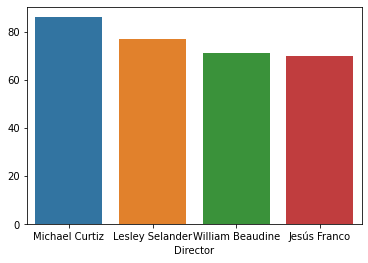

In [23]:
sns.barplot(x=directgenre.index, y= directgenre.values)

#### These 4 directors have higher viewer rates because they produce the most variety of movies. Each customer is different which means each customer likes to watch different genres of movies. By a director producing many genres of movies they can capture more of an audience which leads to more money being made and a high viewer rate. This does not nesscessarily mean that the movies has to be good and rated high in terms of quality. This just means more people watch their movies since they have movies in many different genres.

### Question3(temp)

In [34]:
#count the amount of movies produced in different languages
final['Language'].value_counts()

English                                     35315
French                                       3864
Japanese                                     2775
Spanish                                      2774
Italian                                      2687
                                            ...  
Italian, Hungarian, Latin                       1
Polish, German, English, French, Russian        1
English, Hungarian, French, Korean              1
Hungarian, Turkish, English                     1
Japanese, Indonesian, English                   1
Name: Language, Length: 4299, dtype: int64

### We will exclude the movies produced in English for the following analysis, since it is too obvious that the majority of movies are spoken in English. We will examine the result of the other top languages.

In [35]:
#get a series of all the movie production year
year = final['Date_Published'].dt.year
#get a series of all the languages of the movies
language = final['Language']
#create a new dataframe with the years and languages extracted from the original dataframe
df = pd.DataFrame({'language':language,
                   'year':year})
#drop all the missing values from the new dataframe
df = df.dropna()

In [36]:
#group by both the year and the language, and count how many movies are produced in that specific language, in that year
df_lan_count = df.reset_index().groupby(['year','language'], as_index=False).count().rename(columns={'index':'count'})

### Since we just want to look at the top 3 languages other than English, we split each language into an individual dataframes

In [37]:
#get the data for movies produced in French only
language_French = df_lan_count[df_lan_count['language'] == 'French']
#get the data for movies produced in Japanese only
language_Japanese = df_lan_count[df_lan_count['language'] == 'Japanese']
#get the data for movies produced in Spanish only
language_Spanish = df_lan_count[df_lan_count['language'] == 'Spanish']

Text(0.5, 1.0, 'The Amount of Movies Produced in Different Languages Over Time')

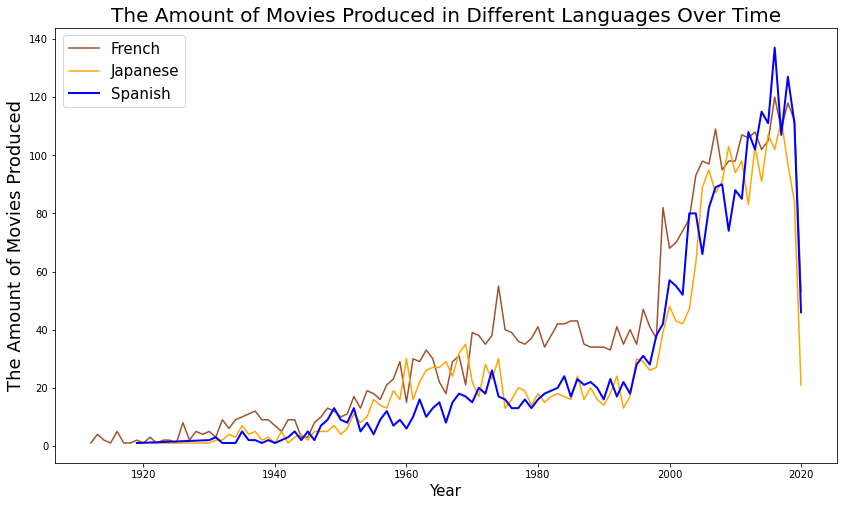

In [38]:
#create an empty plot first
fig, ax = plt.subplots(figsize=(14, 8))
#plot three lines for each language
plt.plot(language_French['year'], language_French['count'], label='French', color='sienna')
plt.plot(language_Japanese['year'], language_Japanese['count'], label='Japanese', color='orange')
plt.plot(language_Spanish['year'], language_Spanish['count'], label='Spanish', color='blue', linewidth=2)
#give the x-axis a label
plt.xlabel('Year', fontsize=15)
#give the y-axis a label
plt.ylabel('The Amount of Movies Produced', fontsize=18)
#give the plot a legend
plt.legend(prop={'size': 15})
#give the plot a title
ax.set_title('The Amount of Movies Produced in Different Languages Over Time', fontsize=20)

## Observation 1
In general, the amounts of movies produced for all three languages have graudally increased since 1960s. Moreover, the total amounts of movie produced for all three have experienced a rapidly increase in the 2000s. The amounts for them are at least twice the amount of the previous decades.

## Inference 1
 Based on the observation, we can infer that the movie industry is heavily influenced by the world economic. In the 1960s and especially the beginning of 2000s, while the amounts of movie produced have increased rapidly, the world economic is also growing dramatically. It is reasonanle since the movie industry is an entertainment industry, which is more likely to be affected by the income people make and overall economics, compared to the industries of the necessity goods. The movie industry is more likely to get investments from the governments and private companies when the economic is considered to be healthy or good. As a result, investers for the movie industry should pay careful attentions to the trend of the economics. By anticipating how the overall economic is going to be, investers can predict how well the movie industry is likely to perform.  

## Observation 2
From the time series graph, we can see that Spanish movies have increased most rapidly from 1920 to 2020 among all the other languages, except for English movies. In fact, according to the previous calculations, we can see that the total amount of movies produced in French, which is 3864, is acutally more than that of movies produced in Spanish, which is 2774. However, the Spanish movies have increased relatively staticly, compared to the other top languages. 

## Inference 2
According to what we found in this observation, we can infer that there is a lot of potential to growth in the Spanish movie markets. Production companies or directors should look into what has made the Spanish movie successful worldwide and how to make it even more popular to the world. Since the majority of the movies are still produced in English, if the production companies or directors can catch the Spanish movie market, they are likely to get a sifnificant share of the market. 

### Question2(temp)

In [39]:
## change to float type
final_shen = final.astype({'Box_Office($)': float})

## fill NAN avtor values with 'unknown'
final_shen['Actors'].fillna(value='unknown', inplace=True)
final_shen.drop_duplicates(subset=['Imdb_Title_Id'], inplace=True)

Convert Actor list element to rows:

In [40]:
df_actors = pd.DataFrame(final_shen['Actors'].str.split(', ').to_list(), index = final_shen['Imdb_Title_Id']).stack()
df_actors = df_actors.reset_index(['Imdb_Title_Id'])
df_actors.columns = ['Imdb_Title_Id','Actors']
df_actors

,Imdb_Title_Id,Actors
0,tt0000009,Blanche Bayliss
1,tt0000009,William Courtenay
2,tt0000009,Chauncey Depew
0,tt0000574,Elizabeth Tait
1,tt0000574,John Tait
...,...,...
10,tt9914942,Arés Fuster
11,tt9914942,Judit Martín
12,tt9914942,Martí Múrcia
13,tt9914942,Mariona Pagès


Convert Genre list element to rows:

In [41]:
df_genre = pd.DataFrame(final_shen['Genre'].str.split(', ').to_list(), index = final_shen['Imdb_Title_Id']).stack()
df_genre = df_genre.reset_index(['Imdb_Title_Id'])
df_genre.columns = ['Imdb_Title_Id','Genre']
df_genre

,Imdb_Title_Id,Genre
0,tt0000009,Romance
0,tt0000574,Biography
1,tt0000574,Crime
2,tt0000574,Drama
0,tt0001892,Drama
...,...,...
1,tt9911196,Drama
0,tt9911774,Drama
0,tt9914286,Drama
1,tt9914286,Family


Then, we try to add box office to actor table to perform further analysis.

In [42]:
df_actors_vote_box = df_actors.merge(final_shen[['Imdb_Title_Id','Box_Office($)']], how='left', on='Imdb_Title_Id')
df_actors_vote_box

,Imdb_Title_Id,Actors,Box_Office($)
0,tt0000009,Blanche Bayliss,NaN
1,tt0000009,William Courtenay,NaN
2,tt0000009,Chauncey Depew,NaN
3,tt0000574,Elizabeth Tait,NaN
4,tt0000574,John Tait,NaN
...,...,...,...
1096960,tt9914942,Arés Fuster,59794.0
1096961,tt9914942,Judit Martín,59794.0
1096962,tt9914942,Martí Múrcia,59794.0
1096963,tt9914942,Mariona Pagès,59794.0


We only care about those actors with known box office data

In [44]:
df_actors_vote_box = df_actors_vote_box[df_actors_vote_box['Box_Office($)'].notna()]

Calculate the total box office created by each actor.

In [45]:
df_actors_vote_box.groupby('Actors')['Box_Office($)'].sum().sort_values(ascending = False).head(10)

Actors
Samuel L. Jackson     1.821119e+10
Robert Downey Jr.     1.520537e+10
Scarlett Johansson    1.450663e+10
Dwayne Johnson        1.193922e+10
Chris Evans           1.150032e+10
Chris Hemsworth       1.147909e+10
Zoe Saldana           1.144682e+10
Paul Bettany          1.113560e+10
Mark Ruffalo          1.095744e+10
Tom Hanks             1.081401e+10
Name: Box_Office($), dtype: float64

We can see top 10 actors that creates the highest total Box Office. 

Now, let us add genere to the table.

In [47]:
df_actors_vote_box_genre = df_actors_vote_box.merge(df_genre, how='left', on='Imdb_Title_Id')
df_actors_vote_box_genre

,Imdb_Title_Id,Actors,Box_Office($),Genre
0,tt0002101,Helen Gardner,71000000.0,Drama
1,tt0002101,Helen Gardner,71000000.0,History
2,tt0002101,Pearl Sindelar,71000000.0,Drama
3,tt0002101,Pearl Sindelar,71000000.0,History
4,tt0002101,Miss Fielding,71000000.0,Drama
...,...,...,...,...
1046805,tt9914942,Arés Fuster,59794.0,Drama
1046806,tt9914942,Judit Martín,59794.0,Drama
1046807,tt9914942,Martí Múrcia,59794.0,Drama
1046808,tt9914942,Mariona Pagès,59794.0,Drama


We try to find out the most popular actors in each genre in terms of box office.

In [53]:
df_group_genre_actor = df_actors_vote_box_genre.groupby(by=['Genre','Actors'])['Box_Office($)'].sum()

Let us display top 3 actors for each genre. 

In [54]:
df_group_genre_actor_top3 = pd.DataFrame(df_group_genre_actor.groupby(level='Genre').nlargest(3).reset_index(level=0, drop=True))


In order to display all rows, we use `set_option` to do so

In [56]:
pd.set_option('display.max_rows', len(df_group_genre_actor_top3))

In [57]:
df_group_genre_actor_top3

Box_Office($)
Genre       Actors                            
Action      Samuel L. Jackson     1.552208e+10
            Robert Downey Jr.     1.370067e+10
            Scarlett Johansson    1.139312e+10
Adventure   Samuel L. Jackson     1.506837e+10
            Robert Downey Jr.     1.358802e+10
            Scarlett Johansson    1.152563e+10
Animation   Alan Tudyk            6.822221e+09
            John Ratzenberger     5.927999e+09
            Christopher Knights   4.818185e+09
Biography   Allen Leech           1.140440e+09
            Joseph Mazzello       1.131805e+09
            Tom Hanks             1.116816e+09
Comedy      Ben Stiller           6.900263e+09
            Steve Carell          6.840863e+09
            Alan Tudyk            6.700976e+09
Crime       Robert De Niro        3.062272e+09
            Brad Pitt             2.968863e+09
            Dwayne Johnson        2.746044e+09
Documentary Andrea Cyrill         2.028612e+06
            Cheryl Needham        2.028612e+06
            Dana MacKay           2.028612e+06
Drama       Leonardo DiCaprio     6.283472e+09
            Cate Blanchett        5.443278e+09
            Tom Hanks             5.345103e+09
Family      Daniel Radcliffe      6.427589e+09
            Richard Griffiths     4.995445e+09
            Emma Watson           4.951376e+09
Fantasy     Johnny Depp           7.075458e+09
            Anthony Daniels       6.133011e+09
            Daniel Radcliffe      6.027106e+09
Film-Noir   Stephen McNally       7.572712e+08
            Rock Hudson           5.953638e+08
            Jim Backus            5.851768e+08
History     Robert Wagner         2.334816e+09
            Allyn Joslyn          2.207987e+09
            Audrey Dalton         2.207987e+09
Horror      Patrick Wilson        1.504357e+09
            Vera Farmiga          1.315331e+09
            Milla Jovovich        1.280395e+09
Music       Mike Myers            1.154938e+09
            Tom Hollander         9.452177e+08
            Aidan Gillen          9.205092e+08
Musical     Amanda Seyfried       1.451627e+09
            Ewan McGregor         1.448999e+09
            Stanley Tucci         1.353584e+09
Mystery     Patrick Wilson        1.803592e+09
            Vera Farmiga          1.582307e+09
            Tom Hanks             1.480771e+09
Romance     Leonardo DiCaprio     3.024590e+09
            Kate Winslet          2.964700e+09
            Kathy Bates           2.889658e+09
Sci-Fi      Robert Downey Jr.     9.469705e+09
            Samuel L. Jackson     9.089117e+09
            Paul Bettany          9.043820e+09
Sport       Sylvester Stallone    1.418162e+09
            Burt Young            1.013740e+09
            Talia Shire           9.058314e+08
Thriller    Tom Cruise            5.653712e+09
            Jason Statham         4.240582e+09
            Judi Dench            3.793652e+09
War         Brad Pitt             6.939173e+08
            Tom Sizemore          6.553393e+08
            Colin Firth           6.421367e+08
Western     James Remar           4.613574e+08
            Rodney A. Grant       4.472568e+08
            David Steen           4.308393e+08

## Q5. Analyzing Movie Descriptions

Filmmaking is not a simple process. A good movie depends not only on a good director but on rest of the team including editors, cinematographers, actors, producers, writers and others. A screenplay is the heart of a film which provides the story and the blueprint of the entire process. Though the writing process is based on creativity, it is also dependent on a few business parameters. A films story is dependent on the current societal demand; what people like, stories that resonate with the majority of audience such musicals. Film production houses take these parameters into account while making decisions, parameters that will lead to the film being liked by a large audience and in turn generating large revenue for the film. I will analyze past films to identify the patterns. 

Film descriptions are a short summary of what the audience should expect from the film. I will analyze descriptions  of films that have scored more than 6.5 on IMDB. This range includes below expectation, average, good and best films. The aim is to identify keywords from the descriptions that will help in uderstanding story elements that work for good films. 

In [58]:
# Importing nltk for NLP
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
from wordcloud import WordCloud
import nltk

I will use stopwords that will help remove conjunctions and other elements from the descriptions. 

Additionally, I will also remove words that are smaller than 4 characters. 

In [60]:
# Setting the stopwords to English
stopwords = set(stopwords.words('english'))
detokenizer = TreebankWordDetokenizer()

In [73]:
# Converting the Description column to string type to do NLP
final = final.astype({'Description':'string'})

# Selecting Films that have an average score greater than 5.9
good_films = final[final['Avg_Vote']>6.5].copy()


# Copying the data to a new dataframe to work on the NLP
description = good_films['Description'].dropna().copy()

 The above code filters out movies that have an average rating of less than 6.5. Additionally, I have dropped the na values from the data for our analysis. 

In [74]:
# Creating a function to remove tokenize the words in teh description 
# Removing the stopwords from the data
def cleaned_desc(desc):
    desc = word_tokenize(desc.lower())
    desc = [token for token in desc if token not in stopwords and token.isalpha() and len(token) > 4 and token !='story']
    return detokenizer.detokenize(desc)

good_films.loc[:,'clean_description'] = description.apply(cleaned_desc)

In [75]:
# Counting the occurence of the words in the description
word_description = good_films['clean_description'].str.split(expand=True).stack().value_counts()

In [76]:
# Displaying the word_description in descending order
word_description.sort_values(ascending=False)

young       3504
family      2139
woman       1990
father      1453
world       1274
            ... 
nordling       1
senshi         1
kainz          1
converts       1
sirens         1
Length: 33703, dtype: int64

I will create a word cloud of the most occuring words int eh movie descriptions for films that have a rating higher than 6.5. I am passing a dictionary of the words and their counts into the WordCloud function. 

In [77]:
#Creating a dictionary of the count values of the description
temp = word_description.to_dict()

In [78]:
# Creating the word cloud and setting the parameters.
word_cloud = WordCloud(collocations = True, background_color = 'white', width=3000, height=2000, max_words=100)

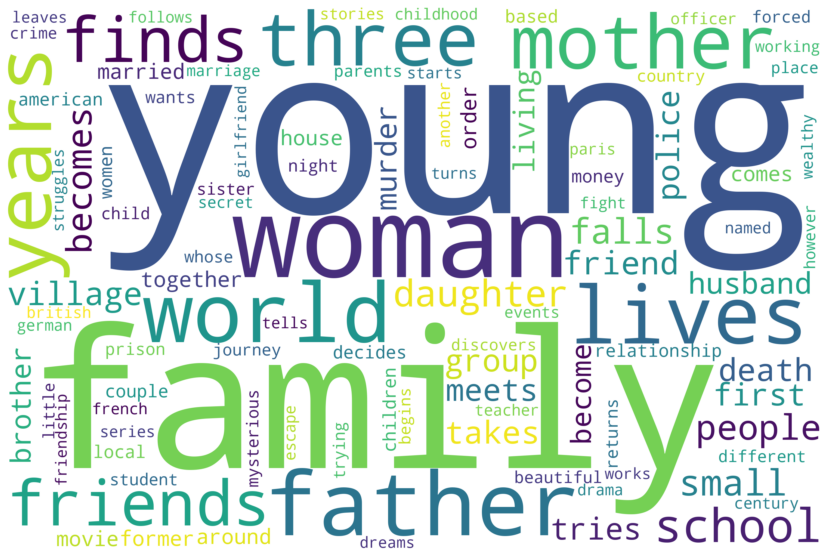

In [79]:
# Generating a word count from the word frequencies
word_cloud.generate_from_frequencies(temp)

#Setting the figure size
plt.figure(figsize=[15,10])
plt.axis("off")

#displaying the word cloud
plt.imshow(word_cloud, interpolation='bilinear')

From the above word cloud, we can see that 'Young' is the word that occurs the most in movie descriptions. This is followed by Family, woman, father and so on. This suggests that a majority of successful films have some element related to 'young' which can be a movie with characters that are young. 
The following can be inferred:

1) Movies about kids or young aged individuals fair well with the audience. 

2) The movie can include a younger representation of the characters. 


Family suggests that the audience like movies that revolve around families, or that include a family. Similarly, woman characters resonate well with the crowd. 

This can provide not only screenwriters, but every individual in the filmmaking process, a roadmap in creating a successful film. 